2024-11-05 04:23:52.565986: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 04:23:52.629827: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 04:23:52.743122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730780632.827271     129 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730780632.846903     129 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 04:23:52.964091: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 195s 36ms/step - accuracy: 0.2249 - loss: 2.4271 - val_accuracy: 0.2486 - val_loss: 2.3270
Epoch 2/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 152s 26ms/step - accuracy: 0.2401 - loss: 2.3356 - val_accuracy: 0.2442 - val_loss: 2.3214
Epoch 3/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 125s 22ms/step - accuracy: 0.2393 - loss: 2.3310 - val_accuracy: 0.2480 - val_loss: 2.3151
Epoch 4/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 114s 22ms/step - accuracy: 0.2413 - loss: 2.3197 - val_accuracy: 0.2474 - val_loss: 2.3191
Epoch 5/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 208s 34ms/step - accuracy: 0.2419 - loss: 2.3231 - val_accuracy: 0.2481 - val_loss: 2.3229
Epoch 6/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 134s 21ms/step - accuracy: 0.2401 - loss: 2.3231 - val_accuracy: 0.2496 - val_loss: 2.3149
Epoch 7/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 206s 33ms/step - accuracy: 0.2409 - loss: 2.3206 - val_accuracy: 0.2499 - val_loss: 2.3162
Epoch 8/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 157s 30ms/step - accuracy: 

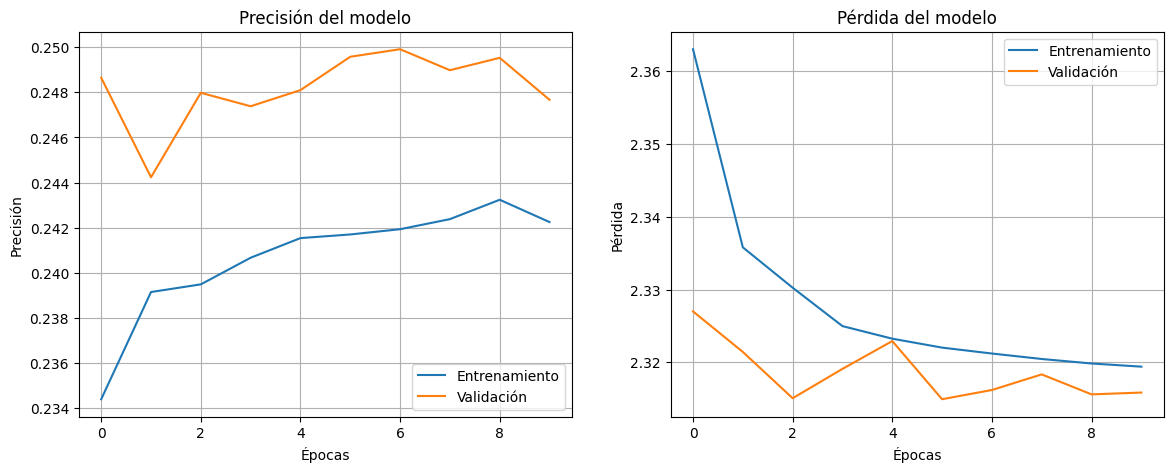

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar los datos
data = pd.read_csv('Crimes_-_2024_20241031.csv')

# Preprocesamiento de datos
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')
data = data.sort_values(by='Date')
data['HOUR'] = data['Date'].dt.hour
data['DAY_OF_WEEK'] = data['Date'].dt.dayofweek
data['MONTH'] = data['Date'].dt.month

# Seleccionar características y etiquetas
X = data[['HOUR', 'DAY_OF_WEEK', 'MONTH']].values
y = data['Primary Type']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Remodelar los datos para cumplir con la entrada esperada por LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Construir la red neuronal recurrente (LSTM)
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ajustar el modelo y guardar el historial
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Visualizar la precisión y la pérdida
plt.figure(figsize=(14, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Mostrar los gráficos
plt.show()

In [2]:
!pip install numpy
!pip install numba
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 827.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 3.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 221.9 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 253.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.2/540.2 kB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.2 MB/s eta 0:0

In [4]:
!pip install pandas
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 4.4 MB/s eta 0:00:00


In [6]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 890.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB ? eta 0:00:000:00:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 656.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 718.7 kB/s eta 0:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.3 MB/s eta 0:00

Epoch 1/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 130s 23ms/step - accuracy: 0.2302 - loss: 2.4244 - val_accuracy: 0.2462 - val_loss: 2.3321
Epoch 2/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 188s 31ms/step - accuracy: 0.2403 - loss: 2.3326 - val_accuracy: 0.2475 - val_loss: 2.3217
Epoch 3/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 130s 17ms/step - accuracy: 0.2389 - loss: 2.3322 - val_accuracy: 0.2452 - val_loss: 2.3203
Epoch 4/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 154s 19ms/step - accuracy: 0.2404 - loss: 2.3275 - val_accuracy: 0.2487 - val_loss: 2.3278
Epoch 5/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - accuracy: 0.2409 - loss: 2.3222 - val_accuracy: 0.2478 - val_loss: 2.3166
Epoch 6/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 88s 17ms/step - accuracy: 0.2418 - loss: 2.3212 - val_accuracy: 0.2477 - val_loss: 2.3242
Epoch 7/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 195s 26ms/step - accuracy: 0.2422 - loss: 2.3157 - val_accuracy: 0.2476 - val_loss: 2.3165
Epoch 8/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 106s 19ms/step - accuracy: 0.

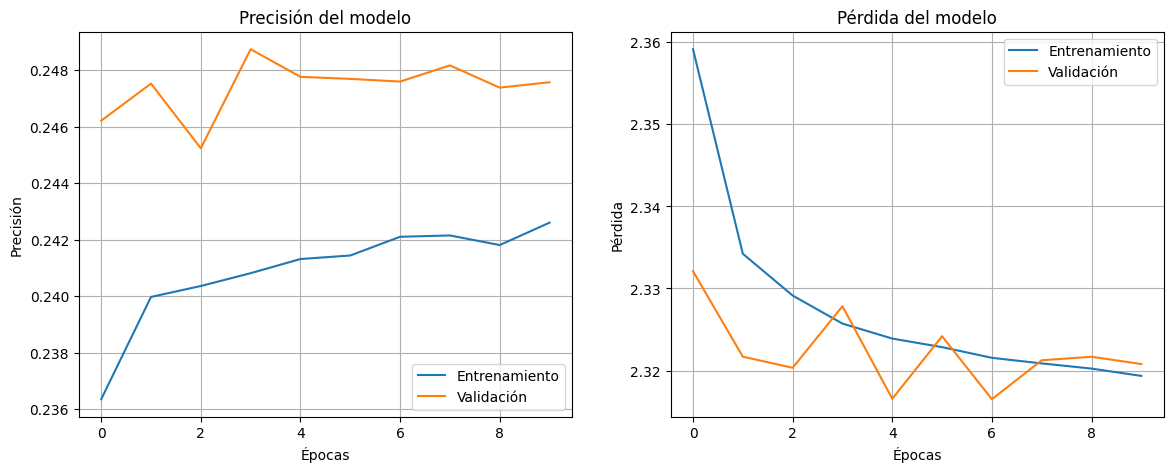

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar los datos
data = pd.read_csv('Crimes_-_2024_20241031.csv')

# Preprocesamiento de datos
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')
data = data.sort_values(by='Date')
data['HOUR'] = data['Date'].dt.hour
data['DAY_OF_WEEK'] = data['Date'].dt.dayofweek
data['MONTH'] = data['Date'].dt.month

# Seleccionar características y etiquetas
X = data[['HOUR', 'DAY_OF_WEEK', 'MONTH']].values
y = data['Primary Type']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Remodelar los datos para cumplir con la entrada esperada por LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Construir la red neuronal recurrente (LSTM)
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ajustar el modelo y guardar el historial
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Visualizar la precisión y la pérdida
plt.figure(figsize=(14, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Mostrar los gráficos
plt.show()

Epoch 1/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 87s 15ms/step - accuracy: 0.2306 - loss: 2.4266 - val_accuracy: 0.2489 - val_loss: 2.3375
Epoch 2/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 92s 17ms/step - accuracy: 0.2412 - loss: 2.3338 - val_accuracy: 0.2487 - val_loss: 2.3270
Epoch 3/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 140s 16ms/step - accuracy: 0.2388 - loss: 2.3343 - val_accuracy: 0.2479 - val_loss: 2.3236
Epoch 4/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 174s 22ms/step - accuracy: 0.2406 - loss: 2.3302 - val_accuracy: 0.2472 - val_loss: 2.3157
Epoch 5/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 122s 18ms/step - accuracy: 0.2418 - loss: 2.3263 - val_accuracy: 0.2491 - val_loss: 2.3175
Epoch 6/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 105s 20ms/step - accuracy: 0.2396 - loss: 2.3204 - val_accuracy: 0.2481 - val_loss: 2.3187
Epoch 7/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 100s 19ms/step - accuracy: 0.2416 - loss: 2.3249 - val_accuracy: 0.2481 - val_loss: 2.3160
Epoch 8/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 142s 19ms/step - accuracy: 0.

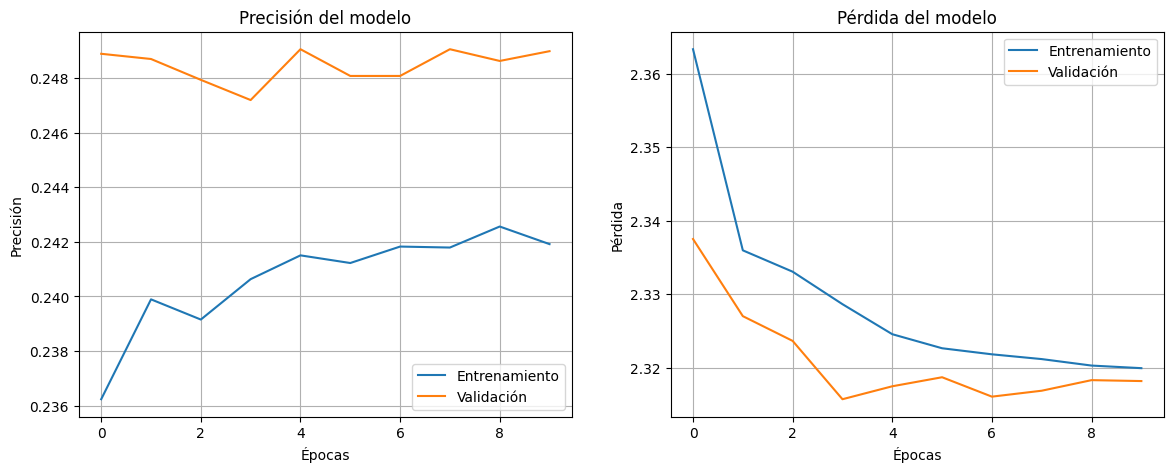

In [9]:
#3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar los datos
data = pd.read_csv('Crimes_-_2024_20241031.csv')

# Preprocesamiento de datos
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')
data = data.sort_values(by='Date')
data['HOUR'] = data['Date'].dt.hour
data['DAY_OF_WEEK'] = data['Date'].dt.dayofweek
data['MONTH'] = data['Date'].dt.month

# Seleccionar características y etiquetas
X = data[['HOUR', 'DAY_OF_WEEK', 'MONTH']].values
y = data['Primary Type']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Remodelar los datos para cumplir con la entrada esperada por LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Construir la red neuronal recurrente (LSTM)
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ajustar el modelo y guardar el historial
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Visualizar la precisión y la pérdida
plt.figure(figsize=(14, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Mostrar los gráficos
plt.show()


Epoch 1/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: nan - val_loss: nan
Epoch 2/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: nan - val_loss: nan
Epoch 3/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: nan - val_loss: nan
Epoch 4/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - loss: nan - val_loss: nan
Epoch 5/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: nan - val_loss: nan
Epoch 6/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: nan - val_loss: nan
Epoch 7/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: nan - val_loss: nan
Epoch 8/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: nan - val_loss: nan
Epoch 9/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: nan - val_loss: nan
Epoch 10/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - loss: nan - val_loss: nan
Epoch 11/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: nan - val_loss: nan
Epoch 12/20
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: nan - val_loss: nan
E

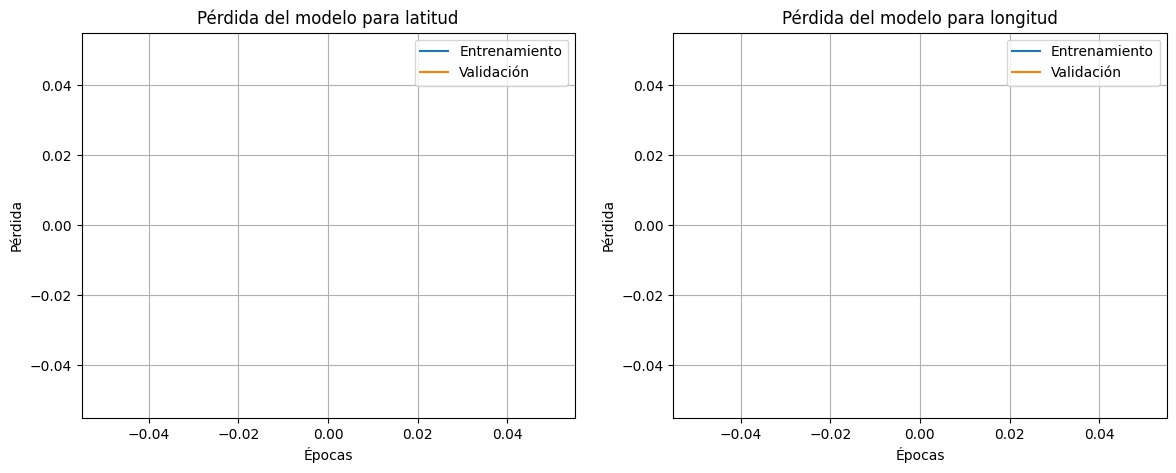

In [10]:
#4
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('Crimes_-_2024_20241031.csv')

# Seleccionar características y etiquetas
X = data[['X Coordinate', 'Y Coordinate']].values
y_latitude = data['Latitude'].values
y_longitude = data['Longitude'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_lat_train, y_lat_test, y_long_train, y_long_test = train_test_split(
    X, y_latitude, y_longitude, test_size=0.2, random_state=42
)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir la red neuronal profunda (DNN) para latitud
model_lat = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Construir la red neuronal profunda (DNN) para longitud
model_long = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilar los modelos
model_lat.compile(optimizer='adam', loss='mse')
model_long.compile(optimizer='adam', loss='mse')

# Ajustar los modelos y guardar los historiales
history_lat = model_lat.fit(X_train, y_lat_train, epochs=20, batch_size=32, validation_data=(X_test, y_lat_test))
history_long = model_long.fit(X_train, y_long_train, epochs=20, batch_size=32, validation_data=(X_test, y_long_test))

# Visualizar la pérdida de los modelos
plt.figure(figsize=(14, 5))

# Gráfico de pérdida del modelo para latitud
plt.subplot(1, 2, 1)
plt.plot(history_lat.history['loss'], label='Entrenamiento')
plt.plot(history_lat.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo para latitud')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Gráfico de pérdida del modelo para longitud
plt.subplot(1, 2, 2)
plt.plot(history_long.history['loss'], label='Entrenamiento')
plt.plot(history_long.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo para longitud')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Mostrar los gráficos
plt.show()


Epoch 1/10


2024-11-05 06:04:47.184691: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67062800 exceeds 10% of free system memory.


5240/5240 ━━━━━━━━━━━━━━━━━━━━ 1132s 214ms/step - accuracy: 0.1234 - loss: 3.7821 - val_accuracy: 0.1225 - val_loss: 3.6983
Epoch 2/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 1149s 219ms/step - accuracy: 0.1219 - loss: 3.7013 - val_accuracy: 0.1225 - val_loss: 3.6971
Epoch 3/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 1117s 210ms/step - accuracy: 0.1229 - loss: 3.6996 - val_accuracy: 0.1225 - val_loss: 3.6977
Epoch 4/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 1086s 207ms/step - accuracy: 0.1215 - loss: 3.6992 - val_accuracy: 0.1225 - val_loss: 3.6939
Epoch 5/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 1105s 207ms/step - accuracy: 0.1226 - loss: 3.6954 - val_accuracy: 0.1225 - val_loss: 3.6943
Epoch 6/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 1106s 211ms/step - accuracy: 0.1223 - loss: 3.6923 - val_accuracy: 0.1225 - val_loss: 3.6940
Epoch 7/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 1177s 213ms/step - accuracy: 0.1223 - loss: 3.6906 - val_accuracy: 0.1225 - val_loss: 3.6927
Epoch 8/10
5240/5240 ━━━━━━━━━━━━━━━━━━━━ 1142s 209ms/step - accur

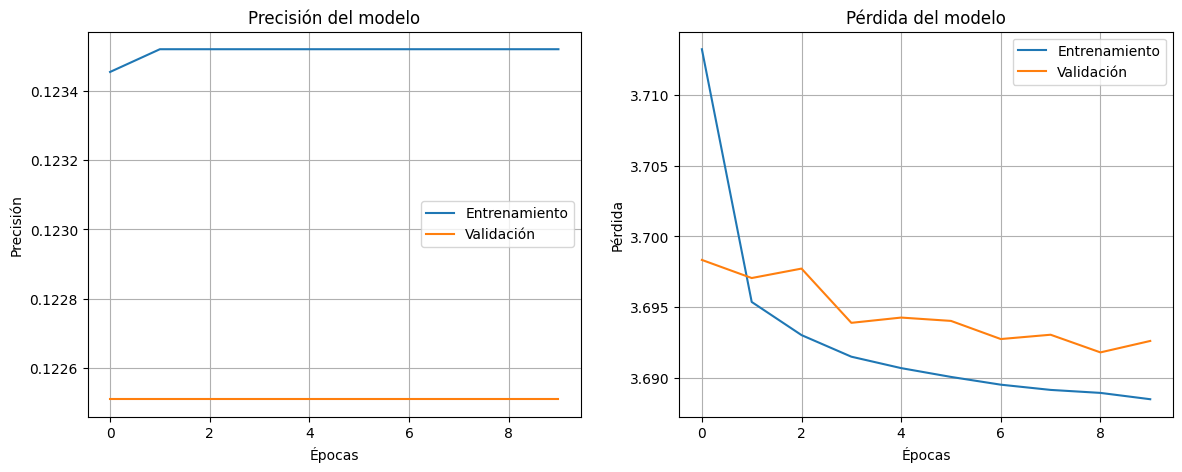

In [11]:
#5
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Definir la dimensión del embedding
embedding_dim = 64

# Cargar los datos
data = pd.read_csv('Crimes_-_2024_20241031.csv')

# Preprocesamiento de datos
X_title = data['Primary Type'].astype(str).values
X_location = data['Location Description'].astype(str).values
y = data['Description'].values

# Codificar etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenización de texto
max_len = 50
vocab_size = 10000  # Número máximo de palabras en el vocabulario

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_title)
X_title_sequences = tokenizer.texts_to_sequences(X_title)

tokenizer.fit_on_texts(X_location)
X_location_sequences = tokenizer.texts_to_sequences(X_location)

X_title_padded = pad_sequences(X_title_sequences, maxlen=max_len, padding='post')
X_location_padded = pad_sequences(X_location_sequences, maxlen=max_len, padding='post')

# Concatenar las características de título y ubicación
X_combined = np.concatenate((X_title_padded, X_location_padded), axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Modelo de texto
model = Sequential([
    Input(shape=(X_combined.shape[1],)),
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ajustar el modelo y guardar el historial
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Visualizar la precisión y la pérdida
plt.figure(figsize=(14, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Mostrar los gráficos
plt.show()